In [46]:
import networkx as nx
import matplotlib.pyplot as plt

In [47]:
with open("bonanza_buyer_item_seller_id_R_2.txt", "r") as f:
    df1 = f.readlines()


with open("ebid_buyer_item_seller_id_R_2.txt", "r") as f:
    df2 = f.readlines()

g1 = nx.Graph()
g2 = nx.Graph()

# loop through the lines in the first dataset

for i in df1:
    transaction_info = i.strip().split("::")
    buyer = transaction_info[0]
    item = transaction_info[1]
    seller = transaction_info[2]

    g1.add_node("Bon_"+buyer, type='buyer')
    g1.add_node("Bon_"+seller, type='seller')
    g1.add_node("Bon_"+item, type='item')
    
    g1.add_edge("Bon_"+buyer, "Bon_"+item, relation='buys')
    g1.add_edge("Bon_"+item, "Bon_"+seller, relation='sold_by')

In [48]:
# loop through the lines in the second dataset
for i in df2:
    transaction_info = i.strip().split("::")
    buyer = transaction_info[0]
    item = transaction_info[1]
    seller = transaction_info[2]

    g2.add_node("Eb_"+buyer, type='buyer')
    g2.add_node("Eb_"+seller, type='seller')
    g2.add_node("Eb_"+item, type='item')

    g2.add_edge("Eb_"+buyer, "Eb_"+item, relation='buys')
    g2.add_edge("Eb_"+item, "Eb_"+seller, relation='sold_by')


In [49]:
# merge the two graphs into a single graph
graph = nx.union(g1, g2)

print(nx.info(graph))

Graph with 10354 nodes and 49290 edges


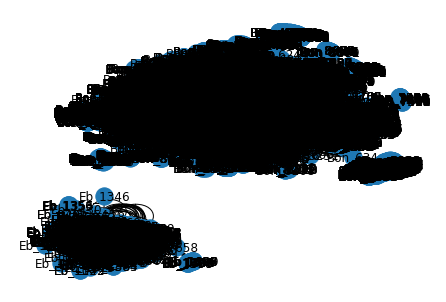

In [53]:
pos = nx.spring_layout(graph)

# draw the graph with the specified layout
nx.draw(graph, pos=pos, with_labels=True)
plt.show()

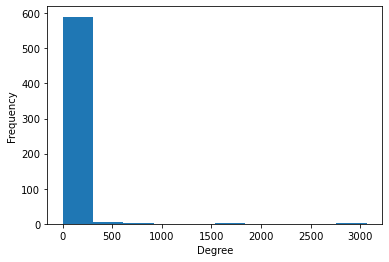

In [51]:
# Get the degree distribution from the graph
degree_hist = nx.degree_histogram(graph)

# plot the degree distribution
plt.hist(degree_hist)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

In [52]:
# calculate the average clustering coefficient
avg_clustering = nx.average_clustering(graph)
print('Average clustering coefficient:', avg_clustering)

Average clustering coefficient: 0.03552686465014255


In [57]:
# calculate degree centrality
degree_centrality = nx.degree_centrality(graph)
avg_degree= sum(degree_centrality.values()) / len(degree_centrality)
print('Average Degree centrality:',avg_degree)

# calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(graph)
avg_between = sum(betweenness_centrality.values()) / len(betweenness_centrality)
print('Average Betweenness centrality:', avg_between)

# calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(graph)
avg_eigen = sum(eigenvector_centrality.values()) / len(eigenvector_centrality)
print('Average Eigenvector centrality:', avg_eigen)

Average Degree centrality: 0.000919632771547467
Average Betweenness centrality: 0.00020825388412139262
Average Eigenvector centrality: 0.003265179906974429
